In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tips_df = sns.load_dataset("tips")
tips_df["sex"]=tips_df["sex"].astype("object")
tips_df["smoker"]=tips_df["smoker"].astype("object")
tips_df["day"]=tips_df["day"].astype("object")
tips_df["time"]=tips_df["time"].astype("object")

tips_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Anzahl und missing-values

In [11]:
print( tips_df.info() )
print( tips_df.describe()  )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# Verschiedene Werte pro Spalte

In [3]:
tips_df.nunique() # haben wir in Dataframes gemacht
#tips_df.describe(include=['object'])
#tips_df.describe()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

# 4 [group->count]Wie häufig ... (beglichen weibliche Gäste die Rechnung)

## Nur mit Dataframes (Gruppierungen)

In [13]:
grouping = tips_df.groupby(["sex"])
print("Count :" , grouping.count())

Count :         total_bill  tip  smoker  day  time  size
sex                                             
Female          87   87      87   87    87    87
Male           157  157     157  157   157   157


## Mit countplots

Text(0.5, 1.0, 'Begleichen der Rechnung nach Geschlecht')

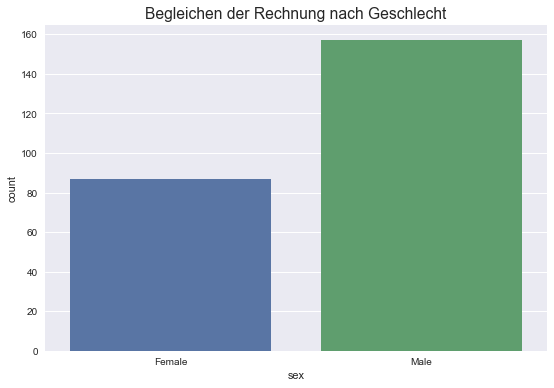

In [15]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="sex")
ax.set_title("Begleichen der Rechnung nach Geschlecht")

# 5 [group -> count] Rechnungen nach Wochentagen 

In [62]:
grouping = tips_df.groupby(["day"])
print("Count nach Wochentagen : ", grouping.mean())

Count nach Wochentagen :        total_bill       tip      size       tip%   bill_pp    tip_pp  \
day                                                                   
Fri    17.151579  2.734737  2.105263  16.991303  8.132851  1.329342   
Sat    20.441379  2.993103  2.517241  15.315172  8.187232  1.212692   
Sun    21.410000  3.255132  2.842105  16.689729  7.864024  1.213022   
Thur   17.682742  2.771452  2.451613  16.127563  7.423368  1.176815   

      total_spent  
day                
Fri     19.886316  
Sat     23.434483  
Sun     24.665132  
Thur    20.454194  


Text(0.5, 1.0, 'Count of tables served by Day')

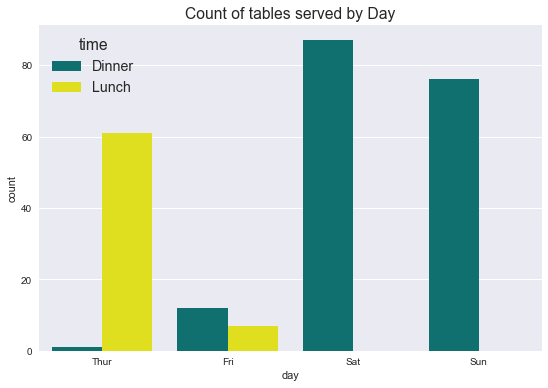

In [22]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
day_order=["Thur", "Fri", "Sat","Sun"]
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="day",hue="time", palette=["teal","yellow"], order=day_order)
ax.set_title("Count of tables served by Day")

Text(0.5, 1.0, 'Count of xxx served by Day')

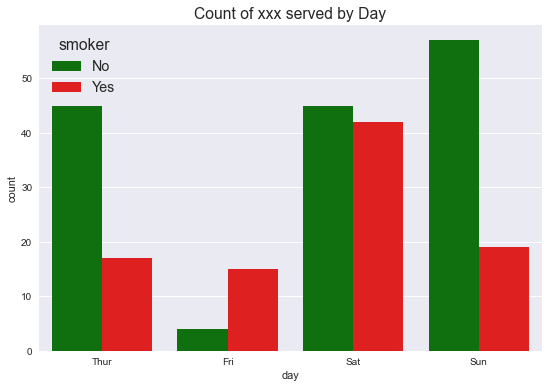

In [28]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
day_order=["Thur", "Fri", "Sat","Sun"]
smoker_pal = dict(Yes="r", No="g")
gender_pal = dict(Female="pink", Male="skyblue")
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="day",hue="smoker", palette=smoker_pal,  order=day_order)
ax.set_title("Count of xxx served by Day")

# 6 Metrische Features (Total Amount und Tip)

## Histogramme

### total_bill

<AxesSubplot:title={'center':'Histogram'}, xlabel='total_bill', ylabel='Count'>

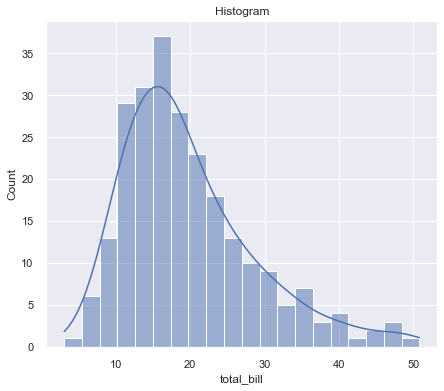

In [33]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram")

sns.histplot(data = tips_df,
             x = "total_bill",
             #binwidth=1,
             #bins="auto",
             bins=20,
             kde = True)

### tip

<AxesSubplot:title={'center':'Histogram'}, xlabel='tip', ylabel='Count'>

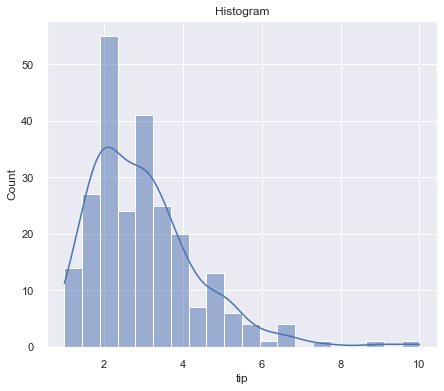

In [34]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram")

sns.histplot(data = tips_df,
             x = "tip",
             #binwidth=1,
             #bins="auto",
             bins=20,
             kde = True)

## Boxplots

### total_bill

<AxesSubplot:title={'center':'Histogram - '}, ylabel='total_bill'>

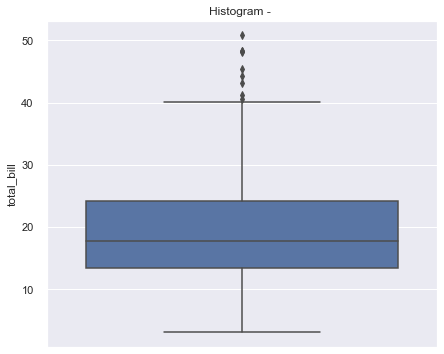

In [38]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram - ")

sns.boxplot(data = tips_df, y = "total_bill") # geht auch mit y = "total_bill"
#sns.boxplot(data = tips_df, y = "total_bill", x="day") # geht auch mit y = "total_bill"
#sns.boxplot(data = tips_df, y = "total_bill", x="day", hue="sex") # geht auch mit y = "total_bill"


# mit order und colorschema
#order_day=["Thur", "Fri", "Sat","Sun"]
#palette_gender = dict(Female="pink", Male="skyblue")
#sns.boxplot(data = tips_df, y = "total_bill", x="day", hue="sex", order=order_day, palette = palette_gender)

### tip

<AxesSubplot:title={'center':'Histogram - '}, ylabel='tip'>

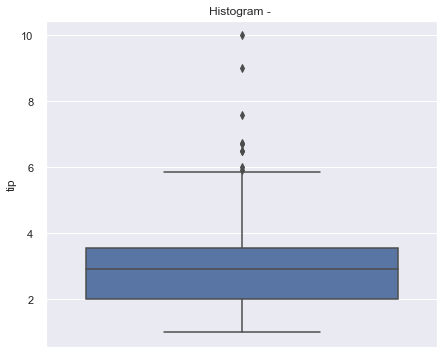

In [39]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram - ")

sns.boxplot(data = tips_df, y = "tip")


# 7 Visualisierung nach Wochentagen

## Anzahl der Abrechnungen

Text(0.5, 1.0, 'Count of tables served by Day')

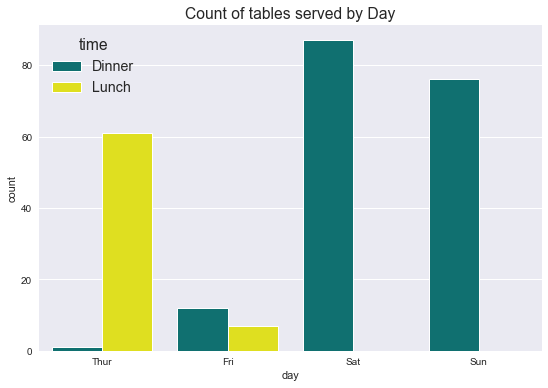

In [26]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
order_day=["Thur", "Fri", "Sat","Sun"]
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="day",hue="time", palette=["teal","yellow"], order=order_day)
ax.set_title("Anzahl der Rechnung nach Tag")

## Anzahl der Gruppen nach Größe der Gruppe

### zuerst ohne Wochentag

Text(0.5, 1.0, 'Anzahl der Rechnung nach Gruppengröße')

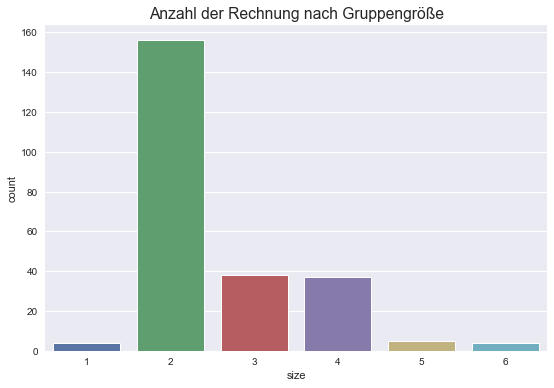

In [27]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="size")
ax.set_title("Anzahl der Rechnung nach Tag/Größe")

### mit Wochentagen

Text(0.5, 1.0, 'Anzahl der Rechnung nach Gruppengröße')

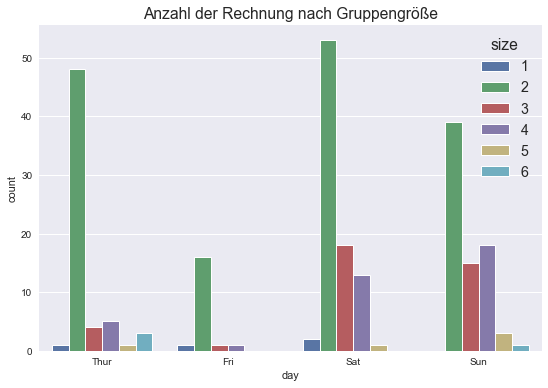

In [37]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.set_context("notebook", font_scale=1.3)
#sns.countplot(data =tips_df, x ="size", hue="day", hue_order=["Thur", "Fri", "Sat", "Sun"])
sns.countplot(data =tips_df, x ="day", hue="size", hue_order=[1,2,3,4,5,6], order = ["Thur", "Fri", "Sat", "Sun"])

ax.set_title("Anzahl der Rechnung nach Tag/Größe")

### mit Dataframes

In [33]:
grouping = tips_df[(tips_df["size"] == 2)].groupby(["day"])
print( grouping.count())

      total_bill  tip  sex  smoker  time  size
day                                           
Fri           16   16   16      16    16    16
Sat           53   53   53      53    53    53
Sun           39   39   39      39    39    39
Thur          48   48   48      48    48    48


## Anzahl der zahlenden Mitglieder nach Geschlecht (siehe auch #4)

Text(0.5, 1.0, 'Anzahl der Rechnung nach Gruppengröße')

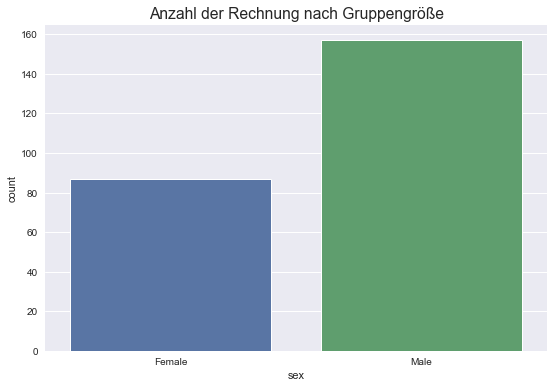

In [34]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(9, 6)) 
sns.set_context("notebook", font_scale=1.3)
sns.countplot(data =tips_df, x ="sex")
ax.set_title("Anzahl der Rechnung nach Gruppengröße")

# 10 Feature Engineering

In [41]:
tips_df['tip%']=tips_df['tip']/tips_df['total_bill']*100
tips_df['bill_pp']=tips_df['total_bill']/tips_df['size']
tips_df['tip_pp']=tips_df['tip']/tips_df['size']
tips_df['total_spent']=tips_df['tip']+ tips_df['total_bill']

tips_df.head()


,total_bill,tip,sex,smoker,day,time,size,tip%,bill_pp,tip_pp,total_spent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,8.495000,0.505000,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,3.446667,0.553333,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,7.003333,1.166667,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,11.840000,1.655000,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,6.147500,0.902500,28.20


# 11a Durchschnittliche Rechnungsbetrag pro Mitglied


<AxesSubplot:title={'center':'Histogram'}, xlabel='bill_pp', ylabel='Count'>

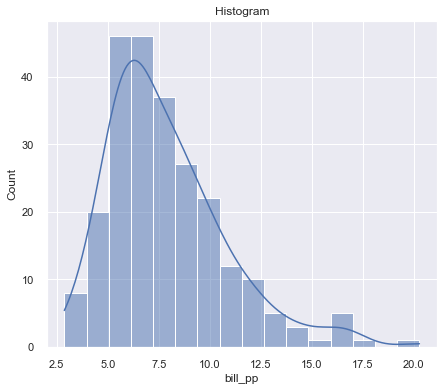

In [44]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram")

sns.histplot(data = tips_df,
             x = "bill_pp",
             #binwidth=1,
             bins="auto",
             #bins=40,
             kde = True)

11b Durchschnittliche Prozentuales Trinkgeld pro Mitglied

<AxesSubplot:title={'center':'Histogram'}, xlabel='tip%', ylabel='Count'>

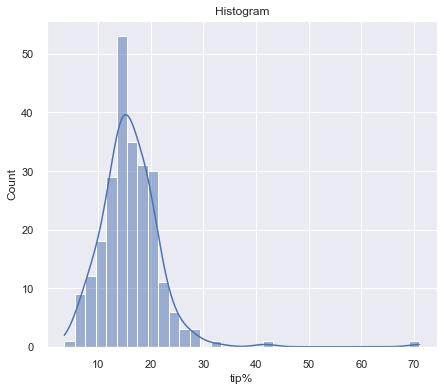

In [47]:
sns.set_theme()
sns.set_context("notebook")
(fig, ax) = plt.subplots( figsize=(7,6))
ax.set_title("Histogram")

sns.histplot(data = tips_df,
             x = "tip%",
             #binwidth=1,
             bins="auto",
             #bins=40,
             kde = True)

## Pairplpots

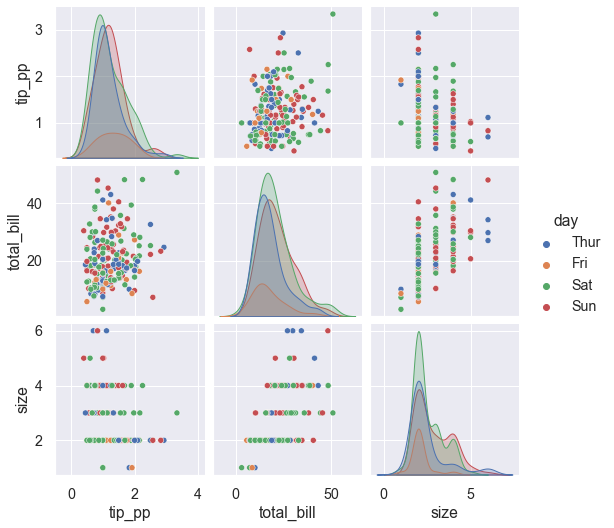

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_context("notebook", font_scale=1.3)

teil_df = tips_df[["tip_pp", "total_bill", "size","sex","day","smoker"]]
gender_pal = dict(Female="pink", Male="skyblue")
sns.pairplot(teil_df, hue="day", hue_order = ["Thur", "Fri", "Sat", "Sun"], diag_kind="kde")

# NEU: Categorical Plot

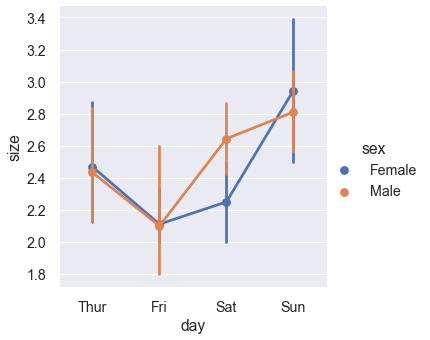

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()
sns.set_context("notebook", font_scale=1.3)

sns.catplot(data = tips_df, x="day", y="size", kind="point", hue="sex", order=["Thur", "Fri", "Sat", "Sun"]);

In [60]:
teil_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


sns.histplot(data = tips_df, x = 'bill_pp')